In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\Abdur rahim nishad\Downloads\home.xlsx")

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape

(29, 2)

In [5]:
df.isna().sum()

area    0
rent    0
dtype: int64

In [6]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

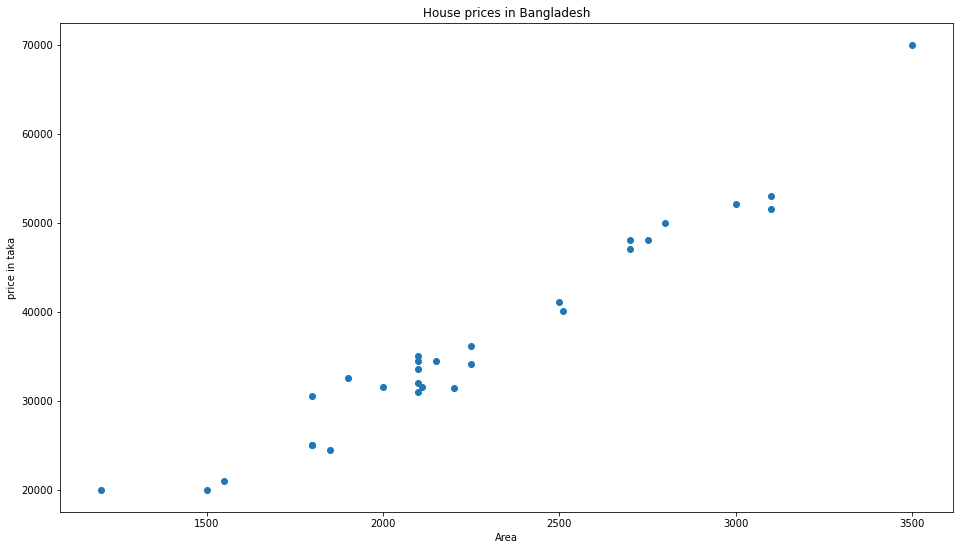

In [7]:
plt.figure(figsize=(16,9))
plt.scatter(df.area,df.rent,)
plt.xlabel("Area")
plt.ylabel("price in taka")
plt.title("House prices in Bangladesh")
plt.show()

In [8]:
df.area.mean()

2259.310344827586

In [9]:
df.rent.mean()

36702.06896551724

In [10]:
x=df.iloc[:,:-1]

In [11]:
x

,area
0,2000
1,2100
2,2500
3,2250
4,3000
5,1900
6,1500
7,1850
8,2700
9,2100


In [12]:
y=df.iloc[:,1:]

In [13]:
y

,rent
0,31500
1,35000
2,41050
3,36100
4,52100
5,32500
6,20000
7,24500
8,48000
9,31000


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=12)

In [16]:
xtrain

,area
20,2110
8,2700
18,1800
0,2000
10,2150
26,2750
28,2200
24,2800
13,2510
5,1900


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg=LinearRegression()

In [19]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [20]:
reg.coef_

array([[20.01998826]])

In [21]:
reg.intercept_

array([-8579.79486094])

In [22]:
reg.predict([[2000]])

array([[31460.18165558]])

In [23]:
20.01998826*2000+(-8579.79486094)

31460.181659060006

In [24]:
pred=reg.predict(xtest)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(ytest,pred)

12082295.538833449

In [27]:
reg.score(xtest,ytest)

0.9325478502612503

In [28]:
from sklearn.metrics import accuracy_score

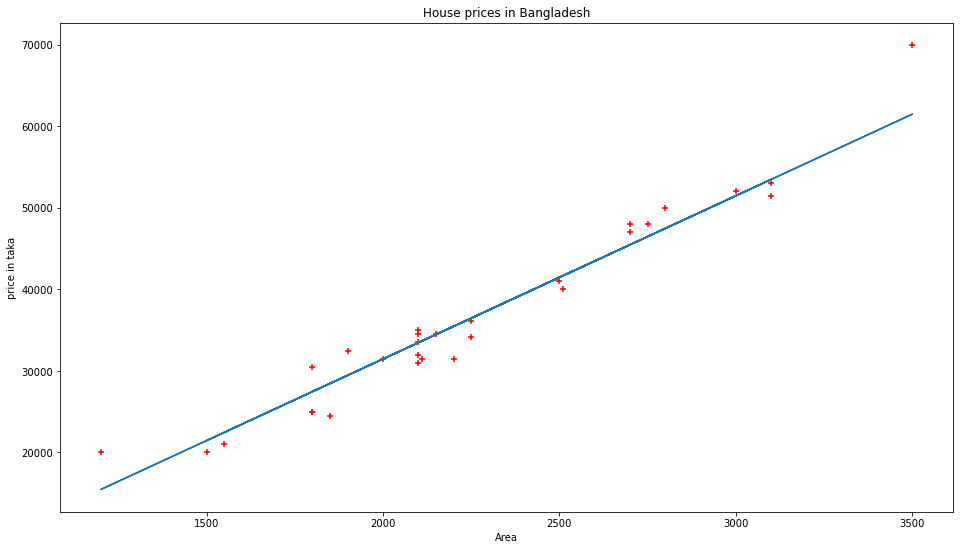

In [29]:
plt.figure(figsize=(16,9))
plt.scatter(df.area,df.rent,marker="+",color="r")
plt.xlabel("Area")
plt.ylabel("price in taka")
plt.title("House prices in Bangladesh")
plt.plot(df.area,reg.predict(x))

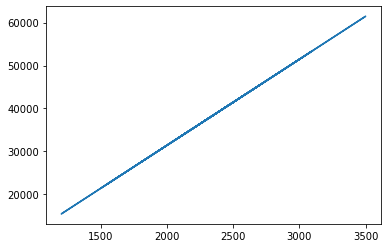

In [30]:
plt.plot(df.area,reg.predict(df[["area"]]))

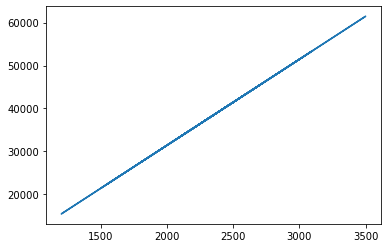

In [31]:
plt.plot(df.area,reg.predict(x))

# save trained model

In [32]:
import pickle

In [33]:
with open("LR_pickle","wb") as file:
    pickle.dump(reg,file)